In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from scipy.stats.stats import pearsonr

# pd.set_option('display.max_columns', None)

# helius iso dataset
current_file = ('./helius_iso_bcgi_10M.csv')

df = pd.read_csv(current_file, index_col=0)
df

,seq_x,observed,copy_number,rel_abund,genome
index,,,,,
0,AAAACGCACACGAACCATTTGCATCAATGC,38,0.00653,0.006697,GCA_009731575.1_ASM973157v1_genomic
1,AAAAGAACGCAGGTCATTCGTGTGCGGATC,38,0.00653,0.006697,GCA_009731575.1_ASM973157v1_genomic
2,AAAAGAGGGCAGGGGCCTCGCTTATTTGAG,38,0.00653,0.006697,GCA_009731575.1_ASM973157v1_genomic
3,AAAAGCCCGCATCGTCATCGGTCCCCGTTC,19,0.00653,0.006697,GCA_009731575.1_ASM973157v1_genomic
4,AAACCATCGCCGAAGCGTTTGCCCGGCATG,38,0.00653,0.006697,GCA_009731575.1_ASM973157v1_genomic
...,...,...,...,...,...
513,TTTGTGTCGCATCACGTTCGCCCATAATTG,1,0.00014,0.000144,GCA_016908785.1_ASM1690878v1_genomic
514,TTTTACTAGACGAACCATTTGCCAATGTTG,1,0.00014,0.000144,GCA_016908785.1_ASM1690878v1_genomic
515,TTTTGCGAGCAATTGCTTCGTTTGGAGCTT,1,0.00014,0.000144,GCA_016908785.1_ASM1690878v1_genomic


This represents the number of reads recovered after recreating fragments

In [2]:
p_tot_frag = int(df['observed'].sum())
print(f'{p_tot_frag} total fragments observed')
df.sort_values('rel_abund', inplace=True)
p_uniq_frag = df.shape[0]
print(f'{p_uniq_frag} unique fragments')
p_taxa_no = len(df['genome'].unique())
print(f'{p_taxa_no} taxa observed')
gen_ls = list(df['genome'].unique())

4730812 total fragments observed
289482 unique fragments
342 taxa observed


ground truth list:

In [3]:
e_ls = []
for gen in gen_ls:
    e = df[df['genome']==gen]['rel_abund'].unique()[0]
    e_ls.append(float(e))

print(len(e_ls))

342


## get the ratio of taxa-to-taxa fragment counts for each fragment length

Calculate all relative abundance comparisons by capturing the inter-taxa ratios for each fragment length. The average of these ratios will be used to determine the overall relative abundance of the taxa, because the ratios should hold regardless of the fragment size being taken into consideration.

In [12]:
test_df = df.copy()
o_ls, median_ls = [], []

for gen in gen_ls:
    o_ls.append(test_df[test_df['genome']==gen]['observed'].mean())
    median_ls.append(test_df[test_df['genome']==gen]['observed'].median())


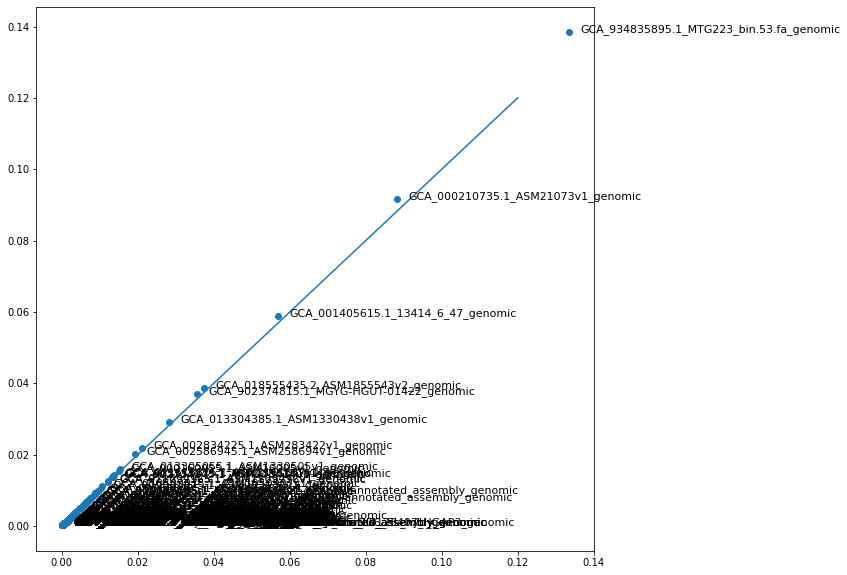


(0.9999863150383911, 0.0)




In [14]:
def count_to_rel(count_ls):
    rel_ls = []
    for i in count_ls:
        rel_ls.append(i/sum(count_ls))
    return rel_ls

o_ls = count_to_rel(median_ls)
median_ls = count_to_rel(median_ls)

plt.figure(figsize=(10,10))
plt.scatter(e_ls, o_ls)
plt.plot([0,.12],[0,.12])
for i, gen_name in enumerate(gen_ls):
    plt.annotate(gen_name, (e_ls[i]+.003, o_ls[i]), fontsize=11)
plt.show()
print(f'\n{pearsonr(e_ls,o_ls)}')
print('\n')

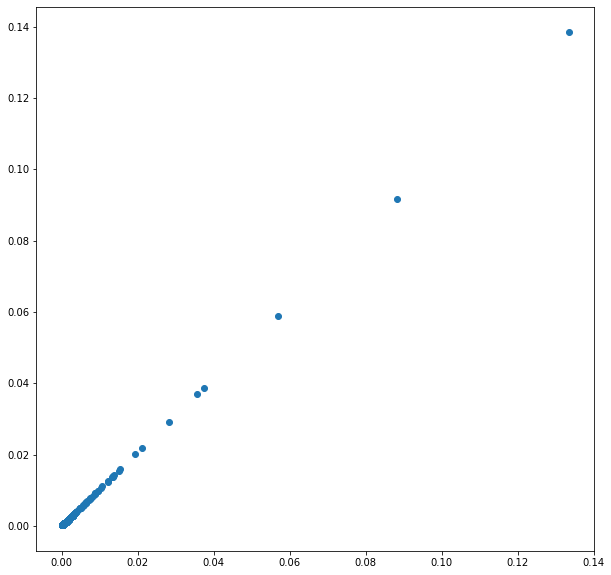


(0.9999863150383911, 0.0)




In [15]:
plt.figure(figsize=(10,10))
plt.scatter(e_ls, o_ls)
# plt.plot([0,.12],[0,.12])
plt.plot([0,.0025],[0,.0025])
plt.show()
print(f'\n{pearsonr(e_ls,o_ls)}')
print('\n')

In [16]:
abundances_df = pd.DataFrame()
abundances_df['genome'] = gen_ls
abundances_df['expected'] = e_ls
abundances_df['mean'] = o_ls
abundances_df['median'] = median_ls
abundances_df.to_csv(os.path.join('./ratios',f'{os.path.basename(current_file)[:-4]}_abundances.csv'))

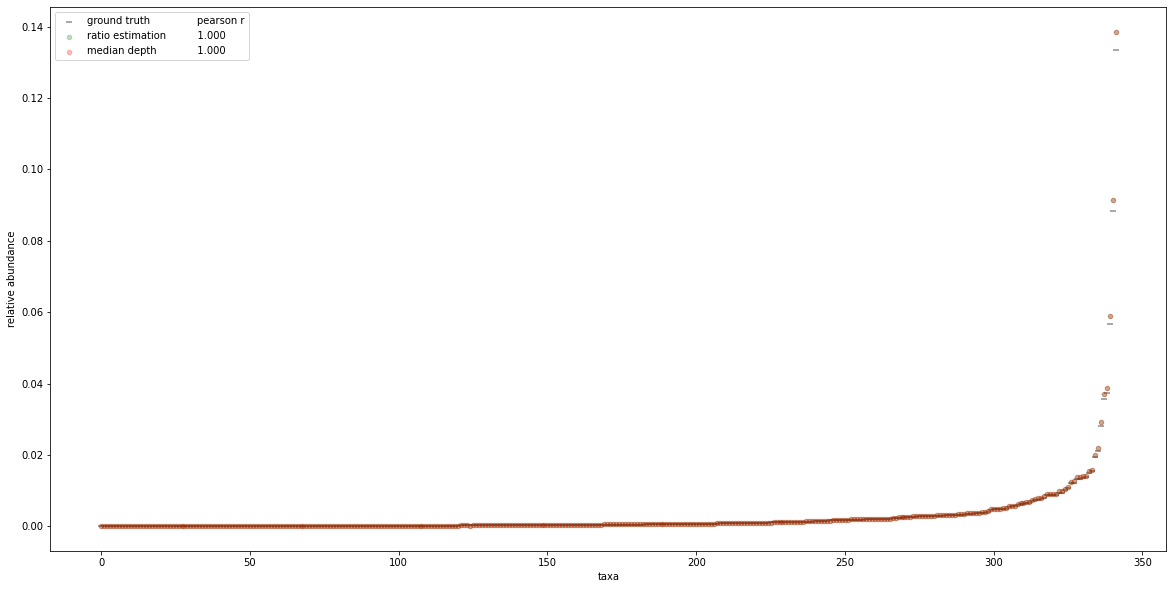

In [17]:
ticks = [i for i in range(len(o_ls))]
labels = [i for i in gen_ls]

a = "{:.3f}".format(pearsonr(e_ls,o_ls)[0])
c = "{:.3f}".format(pearsonr(e_ls,median_ls)[0])

plt.figure(figsize=(20,10))
# plt.xticks(ticks, labels, rotation = 90)
plt.scatter(ticks, e_ls, c='black', marker='_', s=40, alpha=0.45,label='ground truth               pearson r')
plt.scatter(ticks, o_ls, c='green', s=20, alpha=0.25,     label=f'ratio estimation          {a}')
plt.scatter(ticks, median_ls, c='red', s=20, alpha=0.25,  label=f'median depth             {c}')
plt.legend()
plt.ylabel('relative abundance')
plt.xlabel('taxa')
plt.savefig(os.path.join('./figures', f'{os.path.basename(current_file)[:-4]}_abundance.tif'), dpi=350)
plt.savefig(os.path.join('./figures', f'{os.path.basename(current_file)[:-4]}_abundance.png'), dpi=350)
plt.show()

In [ ]:
stop

Below is code specifically catered to the Snipen et al. 2021 datasets

In [ ]:
gen_dt = {'013372085.1' : 'Acinetobacter baumannii',                               
          '000154225.1' : 'Actinomyces odontolyticus',                             
          '000008005.1' : 'Bacillus cereus',                                       
          '000012825.1' : 'Bacteroides vulgatus',                                  
          '000016965.1' : 'Clostridium beijerinckii',                              
          '000008565.1' : 'Deinococcus radiodurans',                               
          '000172575.2' : 'Enterococcus faecalis',                                 
          '000005845.2' : 'Escherichia coli',                                      
          '000008525.1' : 'Helicobacter pylori',                                   
          '000014425.1' : 'Lactobacillus gasseri',                                 
          '000196035.1' : 'Listeria monocytogenes',                                
          '000008805.1' : 'Neisseria meningitidis',                                
          '000008345.1' : 'Propionibacterium acnes',                               
          '000006765.1' : 'Pseudomonas aeruginosa',                                
          '000012905.2' : 'Rhodobacter sphaeroides',                               
          '000017085.1' : 'Staphylococcus aureus',                                 
          '000007645.1' : 'Staphylococcus epidermidis',                            
          '000007265.1' : 'Streptococcus agalactiae',                              
          '000007465.2' : 'Streptococcus mutans',                                  
          '000006885.1' : 'Streptococcus pneumoniae'}

In [ ]:
ticks = [i for i in range(len(o_ls))]
labels = [gen_dt[i.split('_')[1]] for i in gen_ls]
labels = [i for i in gen_ls]

a = "{:.3f}".format(pearsonr(e_ls,o_ls)[0])
b = "{:.3f}".format(pearsonr(e_ls,mean_ls)[0])
c = "{:.3f}".format(pearsonr(e_ls,median_ls)[0])

plt.figure(figsize=(len(o_ls),10))
plt.xticks(ticks, labels, rotation = 90)
plt.scatter(ticks, e_ls, c='black', marker='_', s=300, label='ground truth               pearson r')
plt.scatter(ticks, o_ls, c='green', s=100, alpha=0.5,     label=f'ratio estimation          {a}')
plt.scatter(ticks, mean_ls, c='orange', s=100, alpha=0.5, label=f'mean depth                {b}')
plt.scatter(ticks, median_ls, c='red', s=100, alpha=0.5,  label=f'median depth             {c}')
plt.legend()
plt.ylabel('relative abundance')
plt.savefig(os.path.join('./figures', f'{os.path.basename(current_file)[:-4]}_abundance.tif'), dpi=350)
plt.show()